# CS6330 Project 1: Reinforcement Learning Blackjack Agent

In [1]:
import blackjack
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The goal of this project is to build an intelligent Blackjack player using reinforcement (q-) learning.

## Control experiment

For a control experiment, we'll build a Blackjack player who, per basic Blackjack strategy, hits up to 17, then stands. The dealer will also play this way. This is a _simplified_ version of Blackjack, where we'll treat the deck as a "continuous shuffle" shoe, meaning that each card dealt is a random choice from 52 cards, meaning that the same card twice in a row is possible, but very improbable (though it would be an interesting future experiment to observe how the policy changes should the game use 1-, 2-, 4-deck shoes (and so on) with shuffling taking place when the deck is exhausted). We'll simulate 1,000 hands and see how the player performs. Check the accompanying `blackjack.py` file for the implementations of the player, the scoring algorithm, and more.

In [46]:
games = list()

for x in range(0, 1000):
    games.append(blackjack.Game().play_hand())

In [47]:
df = pd.DataFrame(games)
df.head()

,winner,player_score,dealer_score,player_cards,dealer_cards
0,dealer,17,20,"[Rank.FACE, Rank.SIX, Rank.ACE]","[Rank.FACE, Rank.FACE]"
1,dealer,17,21,"[Rank.SIX, Rank.ACE]","[Rank.FACE, Rank.SIX, Rank.FIVE]"
2,player,19,25,"[Rank.FACE, Rank.NINE]","[Rank.FIVE, Rank.FACE, Rank.FACE]"
3,player,19,18,"[Rank.TWO, Rank.FACE, Rank.ACE, Rank.SIX]","[Rank.TWO, Rank.FOUR, Rank.SIX, Rank.SIX]"
4,player,20,24,"[Rank.FACE, Rank.FIVE, Rank.FIVE]","[Rank.TWO, Rank.FACE, Rank.TWO, Rank.FACE]"


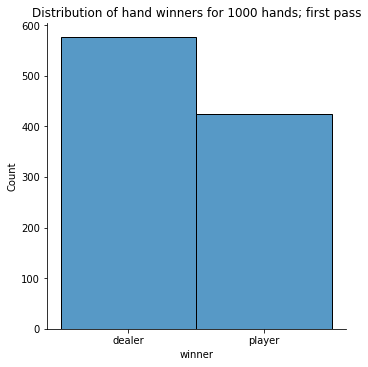

In [48]:
sns.displot(df['winner'])
plt.title('Distribution of hand winners for 1000 hands; first pass')
plt.show()

In [49]:
dealer_win = df['winner'].value_counts()['dealer'] / 1000. * 100
player_win = df['winner'].value_counts()['player'] / 1000. * 100
print(f"Player win percentage: {(player_win):.2f}%")
print(f"Dealer win percentage: {(dealer_win):.2f}%")
print(f"House edge: {(dealer_win - 50):.2f}%")

Player win percentage: 42.40%
Dealer win percentage: 57.60%
House edge: 7.60%


### Measuring the house edge

As a casino game, the rules of Blackjack set up to give the dealer (the _house_) an advantage (an _edge_). Meaning that, after enough games, we'll observe the house averaging out to win a certain percentage over 50%, but never under (hence why gambling is always a bad decision). In a real game of Blackjack, i.e with good player strategy, splits, double-downs, 3:2 payouts on natural Blackjacks, etc, this can be well under 5%, but for this first pass, we got 8.6%. Let's measure the house edge in the following experiments to see if a player whose moves are governed by a Q-learning policy can learn to play better, quantitatively measured by a reduction in the house edge.

## Q-learning experiment

For the next experiment, we'll use a Q-learning algorithm to train a policy which we'll pass to the player and run the same experiment as before. For the first round of training, we're not taking into account the dealer's score, and will only update the Q-table based on whether the player stands before 21, hits exactly 21, or busts.

In [50]:
trainer = blackjack.QLearningTrainer()
trainer.optimize_q_table()

In [51]:
policy = trainer.compile_policy_from_trained_q_table()
games = list()
for x in range(0, 1000):
    games.append(blackjack.Game(policy).play_hand())

In [52]:
df = pd.DataFrame(games)
df.head()

,winner,player_score,dealer_score,player_cards,dealer_cards
0,player,17,25,"[Rank.TWO, Rank.FIVE, Rank.FACE]","[Rank.EIGHT, Rank.SEVEN, Rank.FACE]"
1,player,14,24,"[Rank.FACE, Rank.FOUR]","[Rank.FOUR, Rank.FACE, Rank.FACE]"
2,dealer,12,18,"[Rank.SEVEN, Rank.THREE, Rank.TWO]","[Rank.EIGHT, Rank.FACE]"
3,dealer,15,17,"[Rank.ACE, Rank.FOUR]","[Rank.FACE, Rank.SEVEN]"
4,dealer,13,21,"[Rank.THREE, Rank.FACE]","[Rank.FACE, Rank.ACE]"


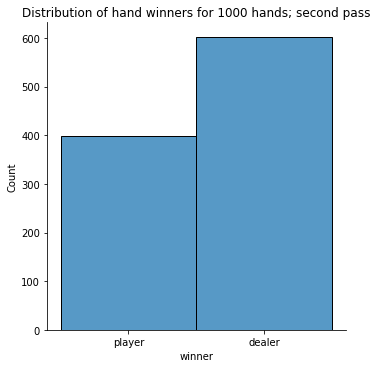

In [53]:
sns.displot(df['winner'])
plt.title('Distribution of hand winners for 1000 hands; second pass')
plt.show()

In [54]:
dealer_win = df['winner'].value_counts()['dealer'] / 1000. * 100
player_win = df['winner'].value_counts()['player'] / 1000. * 100
print(f"Player win percentage: {(player_win):.2f}%")
print(f"Dealer win percentage: {(dealer_win):.2f}%")
print(f"House edge: {(dealer_win - 50):.2f}%")

Player win percentage: 39.80%
Dealer win percentage: 60.20%
House edge: 10.20%


It seems that this method slightly weakened the player and strengthened the house edge. But, that could be because we're not taking into account the dealer's score, so we don't know if we truly win unless we hit exactly 21.

## Q-learning experiment 2

Let's switch the positions of the dealer and the player, so we'll know the dealer's score before the player starts. With that data, we can build a different rewards table that considers the dealer's score, and therefore, whether or not we won not by hitting 21, but rather simply having more points than the dealer, which is a much more common scenario we weren't counting for before.

In [55]:
trainer = blackjack.QLearningTrainer()
trainer.optimize_q_table_v2()

In [56]:
policy = trainer.compile_policy_from_trained_q_table()
policy

[{'state': 1, 'action': 'hit'},
 {'state': 2, 'action': 'stand'},
 {'state': 3, 'action': 'hit'},
 {'state': 4, 'action': 'hit'},
 {'state': 5, 'action': 'hit'},
 {'state': 6, 'action': 'hit'},
 {'state': 7, 'action': 'hit'},
 {'state': 8, 'action': 'hit'},
 {'state': 9, 'action': 'hit'},
 {'state': 10, 'action': 'hit'},
 {'state': 11, 'action': 'hit'},
 {'state': 12, 'action': 'hit'},
 {'state': 13, 'action': 'hit'},
 {'state': 14, 'action': 'hit'},
 {'state': 15, 'action': 'hit'},
 {'state': 16, 'action': 'hit'},
 {'state': 17, 'action': 'hit'},
 {'state': 18, 'action': 'hit'},
 {'state': 19, 'action': 'stand'},
 {'state': 20, 'action': 'stand'},
 {'state': 21, 'action': 'stand'}]

This is a policy much more similar to the standard Blackjack strategy! Let's run the 1,000-game experiment again.

In [57]:
games = list()
for x in range(0, 1000):
    games.append(blackjack.Game(policy).play_hand())

In [58]:
df = pd.DataFrame(games)
df.head()

,winner,player_score,dealer_score,player_cards,dealer_cards
0,player,19,23,"[Rank.EIGHT, Rank.ACE]","[Rank.SEVEN, Rank.NINE, Rank.SEVEN]"
1,player,21,19,"[Rank.THREE, Rank.FACE, Rank.EIGHT]","[Rank.THREE, Rank.FIVE, Rank.ACE]"
2,dealer,26,20,"[Rank.NINE, Rank.SEVEN, Rank.FACE]","[Rank.ACE, Rank.TWO, Rank.THREE, Rank.FOUR]"
3,dealer,24,24,"[Rank.FOUR, Rank.FOUR, Rank.TWO, Rank.FOUR, Ra...","[Rank.FOUR, Rank.SIX, Rank.SIX, Rank.EIGHT]"
4,dealer,22,21,"[Rank.SIX, Rank.FACE, Rank.SIX]","[Rank.THREE, Rank.TWO, Rank.SEVEN, Rank.NINE]"


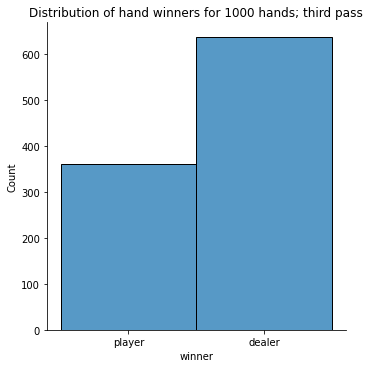

In [59]:
sns.displot(df['winner'])
plt.title('Distribution of hand winners for 1000 hands; third pass')
plt.show()

In [60]:
dealer_win = df['winner'].value_counts()['dealer'] / 1000. * 100
player_win = df['winner'].value_counts()['player'] / 1000. * 100
print(f"Player win percentage: {(player_win):.2f}%")
print(f"Dealer win percentage: {(dealer_win):.2f}%")
print(f"House edge: {(dealer_win - 50):.2f}%")

Player win percentage: 36.20%
Dealer win percentage: 63.80%
House edge: 13.80%


## Conclusions

It seems that this is around the same house edge as the previous iteration. However, this isn't the furthest we could take the experiments. It would be interesting to see if the house edge could be improved by grid-searching for better alpha, lambda, and epsilon values. Futhermore, we could implement other common rules for blackjack for the Q-learning player, such as splitting, doubling-down, and a more realistic deck, as in using single- or double-decks with shuffling when the deck depletes.